In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [31]:
data = pd.read_excel('datasets/Gyeongbu_HSR.xlsx')
data

,Train,Number,Departure Time,Arrival Time,Travel Time (Hours),Additional Information
0,KTX,1,05:13:00,07:49:00,02:36:00,NaN
1,KTX,3,05:28:00,08:15:00,02:47:00,NaN
2,KTX,5,05:58:00,08:42:00,02:44:00,Seodaegu
3,KTX-Sancheon,75,06:03:00,08:48:00,02:45:00,NaN
4,KTX,7,06:33:00,09:21:00,02:48:00,NaN
...,...,...,...,...,...,...
61,KTX-Sancheon,9195,21:33:00,00:09:00,02:36:00,NaN
62,KTX,111,21:38:00,00:47:00,03:09:00,"Seodaegu, Gupo"
63,KTX,71,21:58:00,00:42:00,02:44:00,Seodaegu
64,KTX,73,22:28:00,01:03:00,02:35:00,NaN


In [32]:
def convert_to_hours(time_obj):
    # Extract hours and minutes
    hours = time_obj.hour
    minutes = time_obj.minute
    # Convert to total hours
    total_hours = hours + minutes / 60.0
    return round(total_hours,2)

In [33]:
# Apply the conversion function to the 'Travel Time' column and create a new column for hours
data['Travel Time (Hours)'] = data['Travel Time (Hours)'].apply(convert_to_hours)

In [34]:
data['ID'] = range(1, len(data) + 1)

In [35]:
data

,Train,Number,Departure Time,Arrival Time,Travel Time (Hours),Additional Information,ID
0,KTX,1,05:13:00,07:49:00,2.60,NaN,1
1,KTX,3,05:28:00,08:15:00,2.78,NaN,2
2,KTX,5,05:58:00,08:42:00,2.73,Seodaegu,3
3,KTX-Sancheon,75,06:03:00,08:48:00,2.75,NaN,4
4,KTX,7,06:33:00,09:21:00,2.80,NaN,5
...,...,...,...,...,...,...,...
61,KTX-Sancheon,9195,21:33:00,00:09:00,2.60,NaN,62
62,KTX,111,21:38:00,00:47:00,3.15,"Seodaegu, Gupo",63
63,KTX,71,21:58:00,00:42:00,2.73,Seodaegu,64
64,KTX,73,22:28:00,01:03:00,2.58,NaN,65


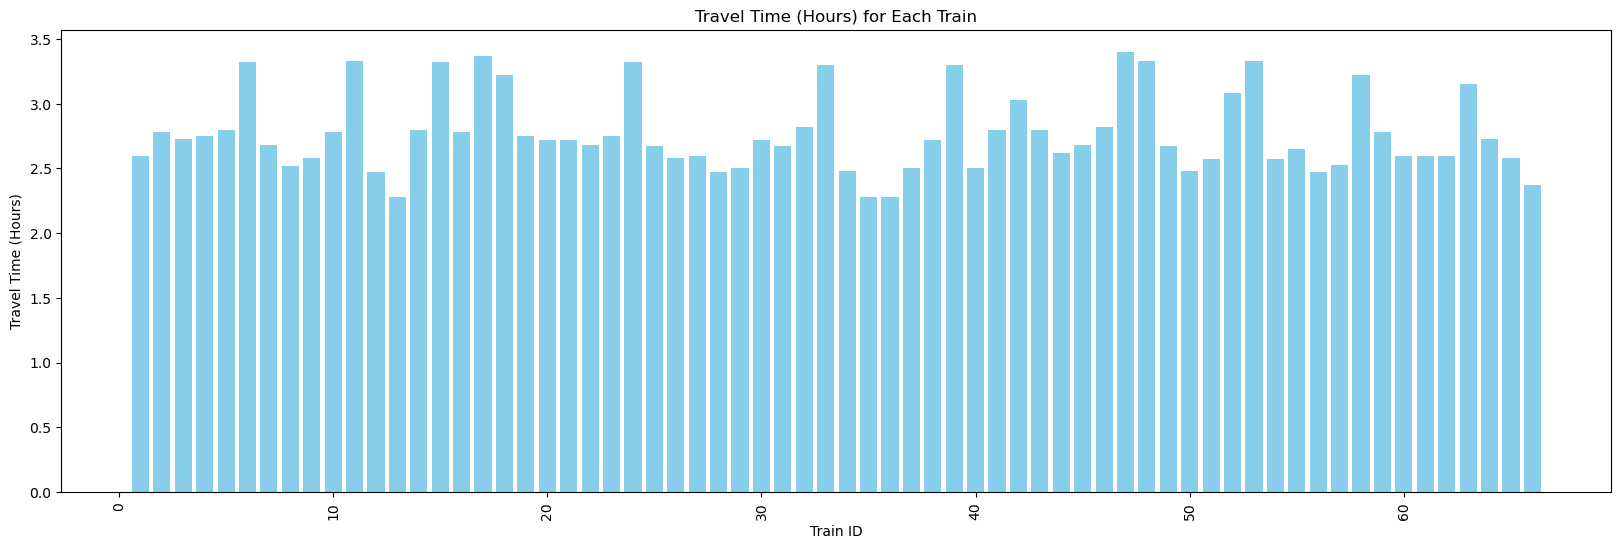

In [36]:
plt.figure(figsize=(20, 6))
plt.bar(data['ID'], data['Travel Time (Hours)'], color='skyblue')
plt.xlabel('Train ID')
plt.ylabel('Travel Time (Hours)')
plt.title('Travel Time (Hours) for Each Train')
plt.xticks(rotation=90)  # Rotate the x labels if there are many trains
plt.savefig('figures/Travel_Time_Trains.png')
plt.show()

In [37]:
def determine_color(travel_time):
    if travel_time > 3:
        return 'red'
    elif travel_time > 2.4:
        return 'orange'
    else:
        return 'skyblue'

# Apply the function to create a color list
data['Color'] = data['Travel Time (Hours)'].apply(determine_color)

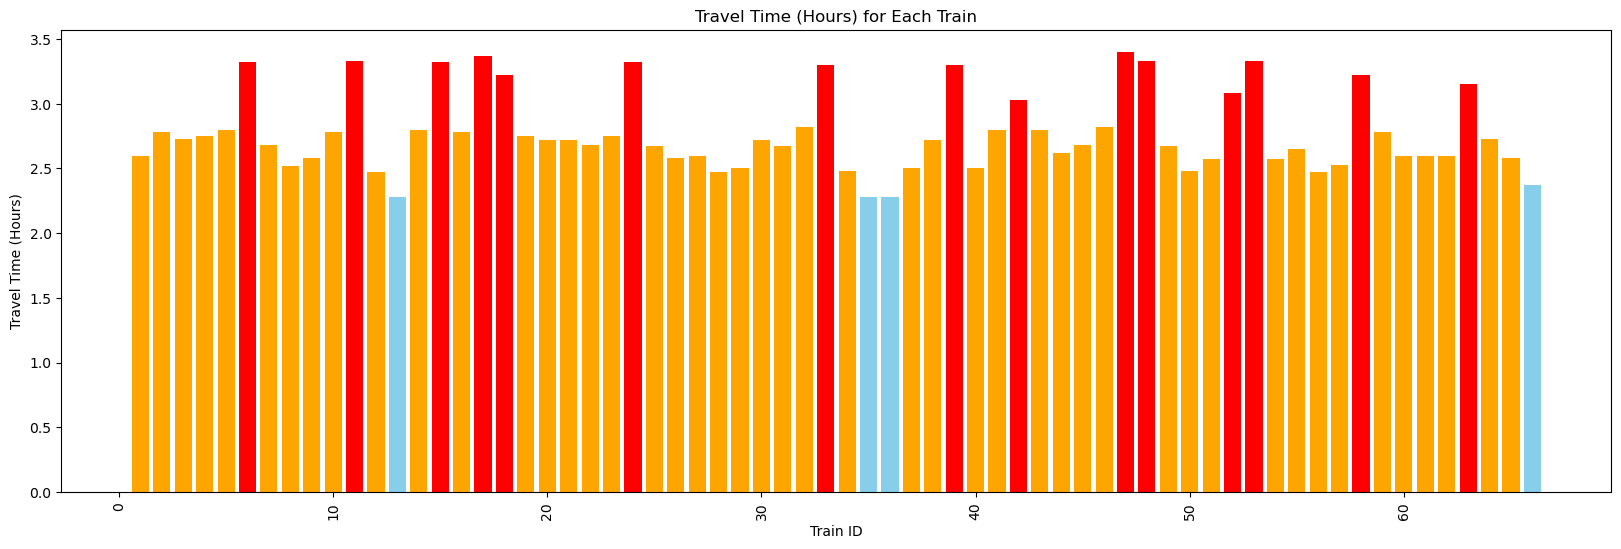

In [38]:
# Plotting the travel time for each train using the sequential ID
plt.figure(figsize=(20, 6))
plt.bar(data['ID'], data['Travel Time (Hours)'], color=data['Color'])
plt.xlabel('Train ID')
plt.ylabel('Travel Time (Hours)')
plt.title('Travel Time (Hours) for Each Train')
plt.xticks(rotation=90)  # Use original Train IDs as labels
plt.savefig('figures/Travel_Time_Trains_Modified.png')
plt.show()

In [39]:
durations = [2.20,2.30,2.40,2.50,2.60,2.70,2.80,2.90,3.00,3.10,3.20,3.30,3.40]
train_num = []

for dur in durations:
    temp = len(data[data['Travel Time (Hours)'] <= dur])
    print(temp)
    train_num.append(temp)

0
3
4
12
24
32
49
51
51
53
54
58
66


In [40]:
train_num

[0, 3, 4, 12, 24, 32, 49, 51, 51, 53, 54, 58, 66]

In [41]:
durations

[2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4]

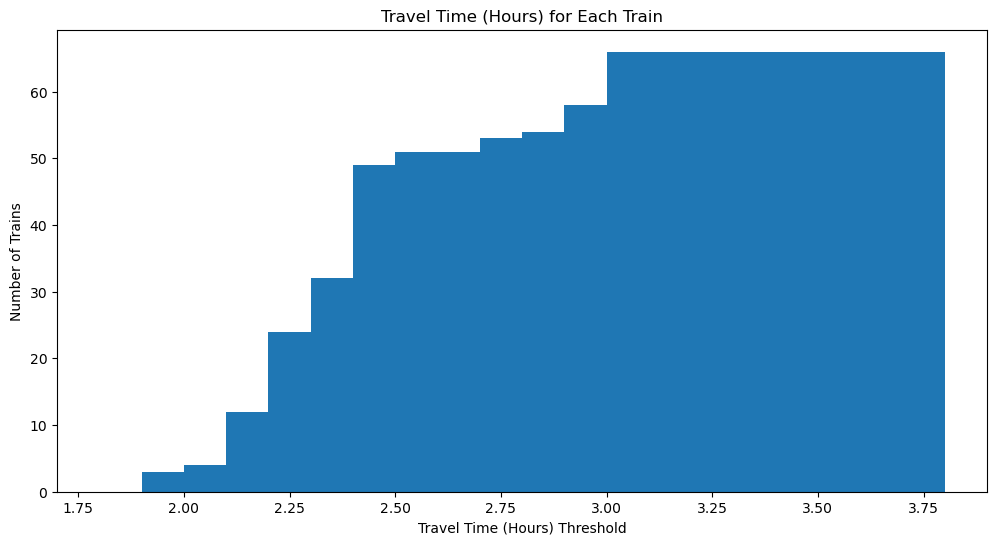

In [42]:
plt.figure(figsize=(12,6))
plt.bar(durations,train_num)
plt.xlabel('Travel Time (Hours) Threshold')
plt.ylabel('Number of Trains')
plt.title('Travel Time (Hours) for Each Train')
plt.savefig('figures/Travel_Time_Trains_Threshold.png')
plt.show()

In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Prepare the data for clustering
k_means_data = data[['ID', 'Travel Time (Hours)']].values

# Standardize the data
scaler = StandardScaler()
k_means_data_scaled = scaler.fit_transform(k_means_data)

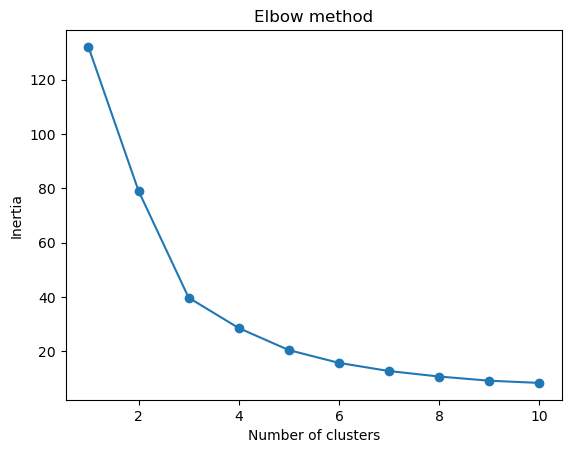

In [45]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_means_data_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

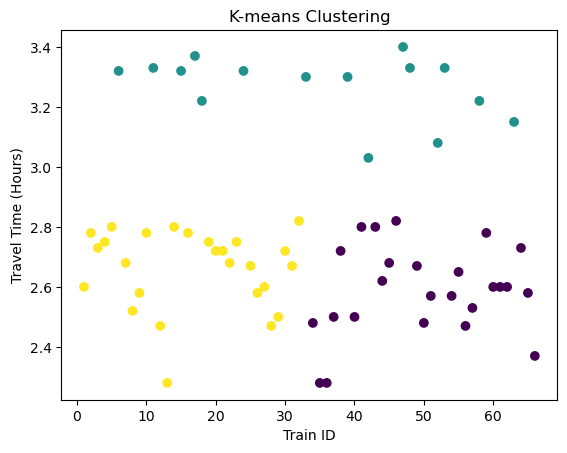

In [46]:
# Fit K-means with the optimal number of clusters
k = 3  # Use the optimal number of clusters determined from the Elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(k_means_data_scaled)

# Visualize the clusters using the standardized data as a reference
plt.scatter(k_means_data[:, 0], k_means_data[:, 1], c=kmeans.labels_)
plt.title('K-means Clustering')
plt.xlabel('Train ID')
plt.ylabel('Travel Time (Hours)')
plt.savefig('figures/Kmeans_cluster_results.png')
plt.show()

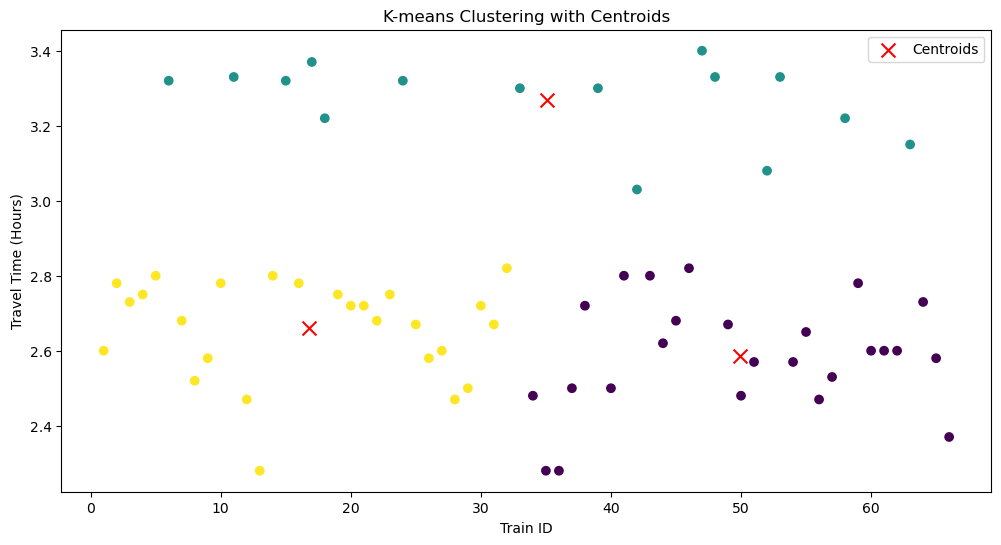

In [47]:
# Get the centroids
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

# Visualize the clusters with centroids
plt.figure(figsize=(12, 6))
plt.scatter(k_means_data[:, 0], k_means_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('K-means Clustering with Centroids')
plt.xlabel('Train ID')
plt.ylabel('Travel Time (Hours)')
plt.legend()
plt.savefig('figures/Kmeans_centroid_results.png')
plt.show()


In [48]:
centroids

array([[49.92      ,  2.5872    ],
       [35.06666667,  3.268     ],
       [16.80769231,  2.66153846]])

In [49]:
from sklearn.decomposition import PCA

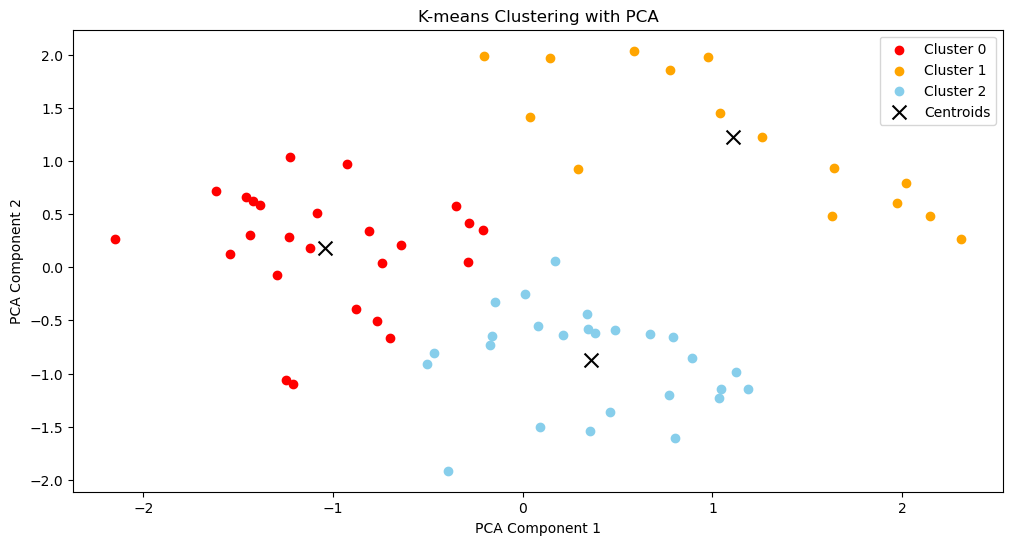

In [50]:
# Standardize the data
scaler = StandardScaler()
k_means_data_scaled = scaler.fit_transform(k_means_data)

# Apply PCA
pca = PCA(n_components=2)
k_means_data_pca = pca.fit_transform(k_means_data_scaled)

# Fit K-means with the optimal number of clusters
k = 3  # Use the optimal number of clusters determined from the Elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(k_means_data_pca)

# Visualize the clusters with PCA components
plt.figure(figsize=(12, 6))
colors = ['red', 'orange', 'skyblue']
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(k_means_data_pca[cluster_data.index, 0], k_means_data_pca[cluster_data.index, 1], 
                color=colors[cluster], label=f'Cluster {cluster}')
# Plot centroids
centroids_pca = kmeans.cluster_centers_
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering with PCA')
plt.legend()
plt.show()